<a href="https://colab.research.google.com/github/nmuonko/My-Projects/blob/main/World_Happiness_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv('2019.csv')
df.head()




,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


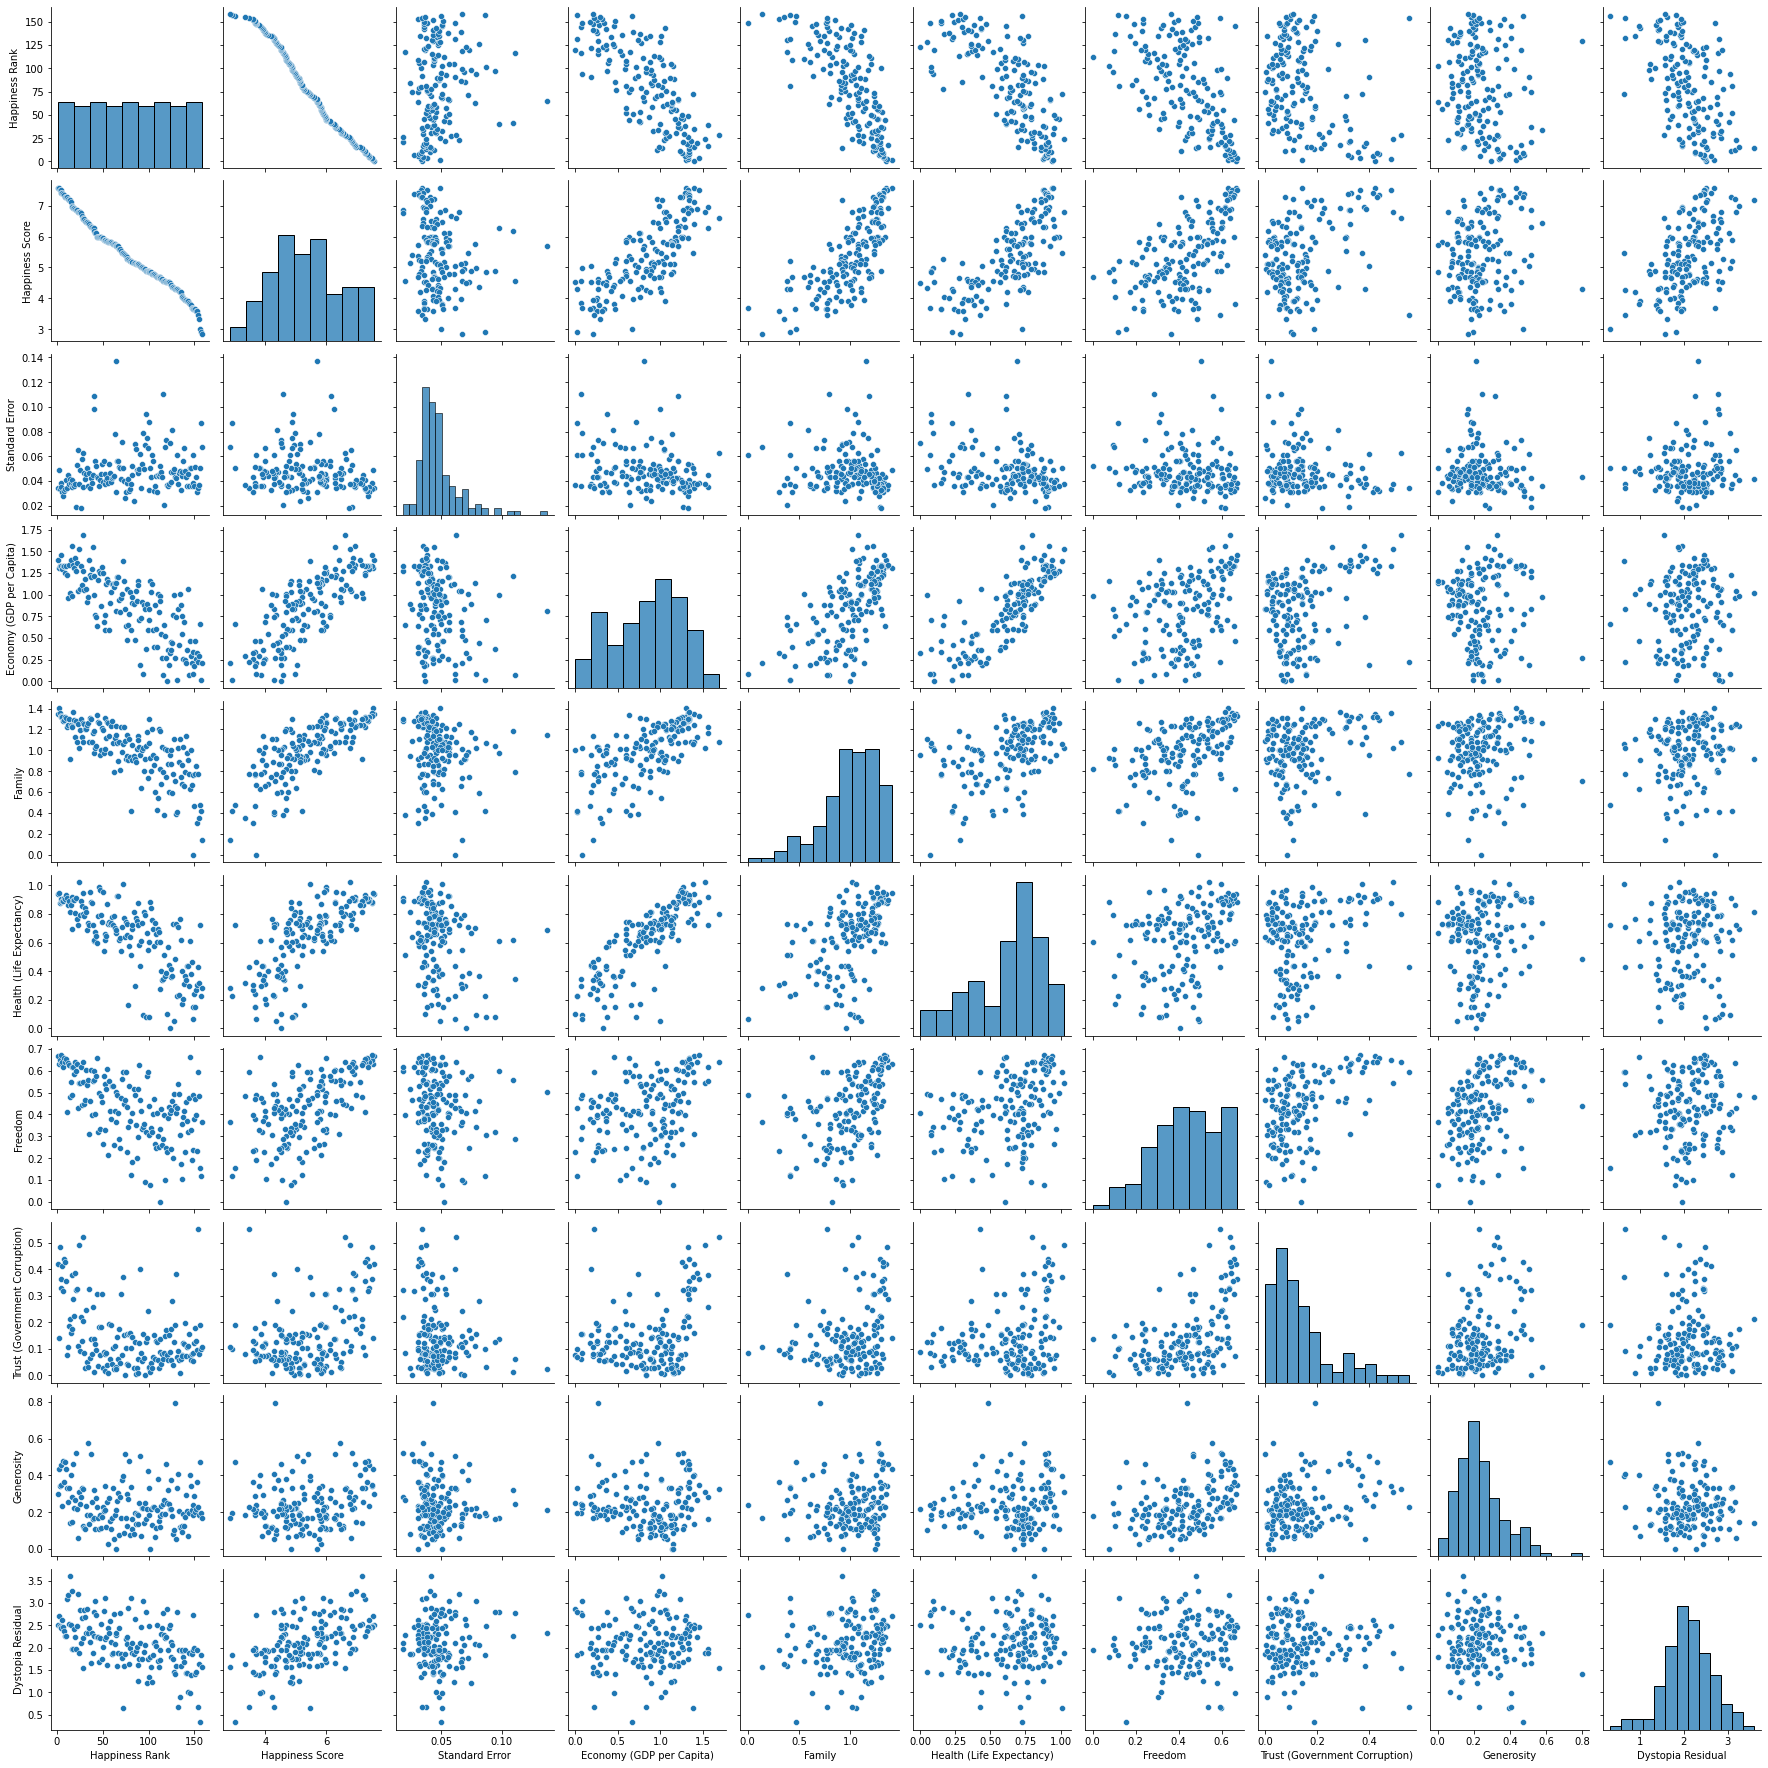

In [12]:
import seaborn as sns
sns.pairplot(df)

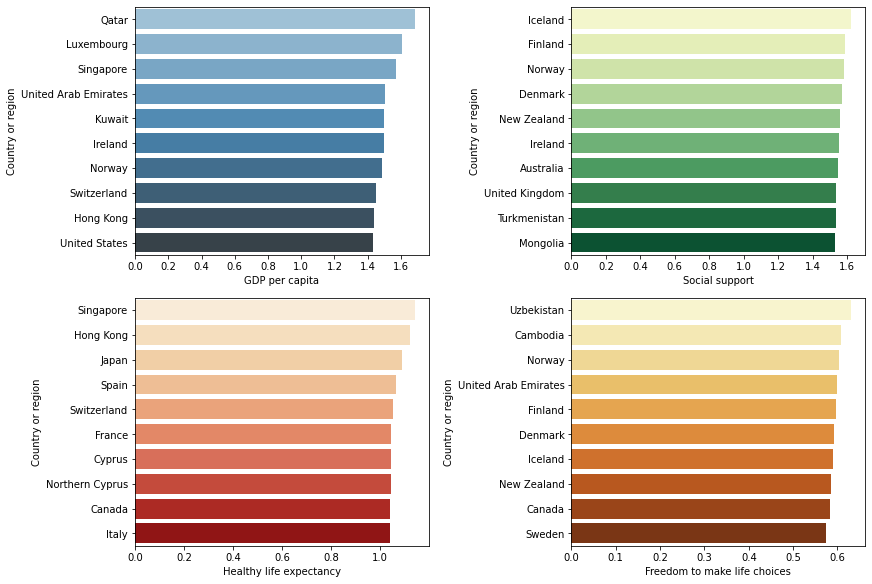

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

Let's find the category to each country as High, Mid and Low according to their happiness scores.

In [15]:
print('max:',df['Score'].max())
print('min:',df['Score'].min())
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.769
min: 2.853
range difference: 1.639


In [16]:
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

upper bound of Low grp 4.492
upper bound of Mid grp 6.131
upper bound of High grp max: 7.769


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [18]:
df.isnull().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Adding a new column Category to the data set and distributing the levels High,Low,Mid.

In [19]:
cat=[]
for i in df.Score:
    if(i>0 and i<low):
        cat.append('Low')
        
        
    elif(i>low and i<mid):
         cat.append('Mid')
    else:
         cat.append('High')

df['Category']=cat  

Also we will be styling the data set as a green zone and red zone .If the country belongs to the High category then it is under the green zone and if it is under the Mid or Low category it is going to be the red zone.

In [20]:
color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
df.style.apply(lambda s: color)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,High
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000,High
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000,High
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,High
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000,High
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,High
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,High
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000,High
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000,High
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000,High


Now since I am from Congo (Kinshasa) I would like to see my countries position on the list and also checkout some other countries where people from India usually settle for economic benefits. So lets check them out:

In [21]:
df.loc[df['Country or region']=='Congo (Kinshasa)']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
126,127,Congo (Kinshasa),4.418,0.094,1.125,0.357,0.269,0.212,0.053,Low


In [24]:
data={
    'Country or region':['Canada','US','UK','Congo (Kinshasa)'],
    'Score':[7.278,6.892,7.054,4.015],
    'GDP per capita':[1.365,1.433,1.333,0.755],
    'Social support':[1.505,1.457,1.538,0.765],
    'Healthy life expectancy':[1.039,0.874,0.996,0.588],
    'Freedom to make life choices':[0.584,0.454,0.45,0.498],
    'Generosity':[0.285,0.28,0.348,0.2],
    'Perceptions of corruption':[0.308,0.128,0.278,0.085]
}
d=pd.DataFrame(data)
d

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
1,US,6.892,1.433,1.457,0.874,0.454,0.280,0.128
2,UK,7.054,1.333,1.538,0.996,0.450,0.348,0.278
3,Congo (Kinshasa),4.015,0.755,0.765,0.588,0.498,0.200,0.085


**Social Support vs GDP per capita vs Healthy life expectancy**

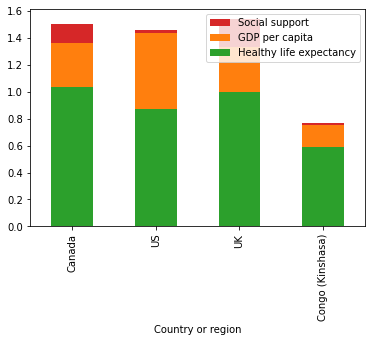

In [25]:
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

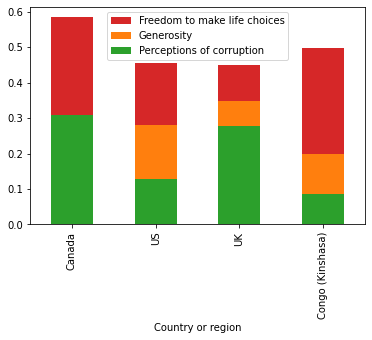

In [26]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()

**Geographic Visualization of Happiness Score**

In [31]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth', 
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'], 
           text = df['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score', 
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)